In [1]:
import plaidml.keras
plaidml.keras.install_backend()

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import rmsprop
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
image_size = (150,150)
dataset_dir = '../data/training'
augmented_dataset_dir = '../data/training_augmented'
batch_size = 16

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    fill_mode='nearest',
    data_format='channels_last',
    zoom_range=[0.9, 1.25],
    brightness_range=[0.9, 1.3],
    validation_split=0.2
    
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    class_mode='categorical',
    target_size=image_size,
    batch_size=batch_size,
    subset='training',
    color_mode='grayscale'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    class_mode='categorical',
    target_size=image_size,
    batch_size=batch_size,
    subset='validation',
    color_mode='grayscale'
)


Found 10353 images belonging to 6 classes.
Found 2585 images belonging to 6 classes.


### Modeling

In [4]:
model = Sequential()

model.add(Conv2D(32,(3, 3),input_shape=(image_size[0], image_size[0], 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(rmsprop(lr=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()


INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [5]:
trains_steps = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size
model_checkpoint = ModelCheckpoint('weights/weights{epoch:08d}.h5', save_weights_only=True, period=5)

fit_result = model.fit_generator(
    train_generator,
    steps_per_epoch=trains_steps,
    validation_data =validation_generator,
    validation_steps=validation_steps,
    epochs=200,
    callbacks=[model_checkpoint]
)

model.save_weights('weights.h5')

Epoch 1/200
647/647 [==============================] - 62s 96ms/step - loss: 1.4038 - acc: 0.4048 - val_loss: 1.0871 - val_acc: 0.5893
Epoch 2/200
647/647 [==============================] - 56s 86ms/step - loss: 1.1056 - acc: 0.5575 - val_loss: 0.8995 - val_acc: 0.6621
Epoch 3/200
647/647 [==============================] - 55s 84ms/step - loss: 0.9578 - acc: 0.6205 - val_loss: 0.8228 - val_acc: 0.6672
Epoch 4/200
647/647 [==============================] - 54s 84ms/step - loss: 0.8504 - acc: 0.6706 - val_loss: 0.6825 - val_acc: 0.7723
Epoch 5/200
647/647 [==============================] - 54s 84ms/step - loss: 0.7773 - acc: 0.7098 - val_loss: 0.6242 - val_acc: 0.7863
Epoch 6/200
647/647 [==============================] - 54s 84ms/step - loss: 0.7100 - acc: 0.7505 - val_loss: 0.5373 - val_acc: 0.8170
Epoch 7/200
647/647 [==============================] - 54s 84ms/step - loss: 0.6735 - acc: 0.7645 - val_loss: 0.5003 - val_acc: 0.8318
Epoch 8/200
647/647 [==============================] - 

Epoch 61/200
647/647 [==============================] - 53s 82ms/step - loss: 16.1181 - acc: 0.0082 - val_loss: 16.1181 - val_acc: 0.0066
Epoch 62/200
647/647 [==============================] - 54s 83ms/step - loss: 16.1181 - acc: 0.0082 - val_loss: 16.1181 - val_acc: 0.0070
Epoch 63/200
647/647 [==============================] - 53s 82ms/step - loss: 16.1181 - acc: 0.0076 - val_loss: 16.1181 - val_acc: 0.0074
Epoch 64/200
647/647 [==============================] - 53s 82ms/step - loss: 16.1181 - acc: 0.0082 - val_loss: 16.1181 - val_acc: 0.0078
Epoch 65/200
647/647 [==============================] - 54s 83ms/step - loss: 16.1181 - acc: 0.0084 - val_loss: 16.1181 - val_acc: 0.0082
Epoch 66/200
647/647 [==============================] - 54s 83ms/step - loss: 16.1181 - acc: 0.0073 - val_loss: 16.1181 - val_acc: 0.0066
Epoch 67/200
647/647 [==============================] - 53s 82ms/step - loss: 16.1181 - acc: 0.0089 - val_loss: 16.1181 - val_acc: 0.0086
Epoch 68/200
647/647 [============

647/647 [==============================] - 53s 83ms/step - loss: 16.1181 - acc: 0.0080 - val_loss: 16.1181 - val_acc: 0.0082
Epoch 180/200
647/647 [==============================] - 53s 83ms/step - loss: 16.1181 - acc: 0.0081 - val_loss: 16.1181 - val_acc: 0.0082
Epoch 181/200
647/647 [==============================] - 53s 83ms/step - loss: 16.1181 - acc: 0.0078 - val_loss: 16.1181 - val_acc: 0.0066
Epoch 182/200
647/647 [==============================] - 54s 83ms/step - loss: 16.1181 - acc: 0.0083 - val_loss: 16.1181 - val_acc: 0.0074
Epoch 183/200
647/647 [==============================] - 53s 83ms/step - loss: 16.1181 - acc: 0.0080 - val_loss: 16.1181 - val_acc: 0.0090
Epoch 184/200
647/647 [==============================] - 53s 83ms/step - loss: 16.1181 - acc: 0.0078 - val_loss: 16.1181 - val_acc: 0.0070
Epoch 185/200
647/647 [==============================] - 54s 83ms/step - loss: 16.1181 - acc: 0.0082 - val_loss: 16.1181 - val_acc: 0.0086
Epoch 186/200
647/647 [==================

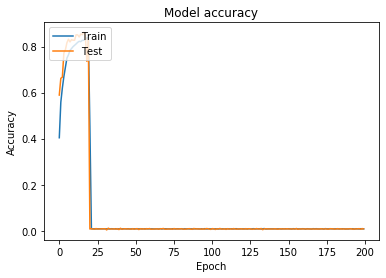

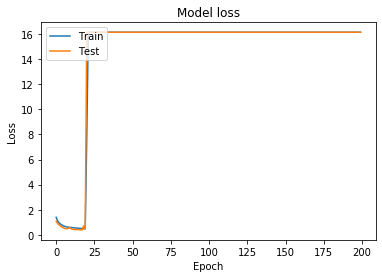

In [6]:
# Accuracy
plt.plot(fit_result.history['acc'])
plt.plot(fit_result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(fit_result.history['loss'])
plt.plot(fit_result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()